In [1]:
import nltk
from konlpy.tag import Hannanum
import pandas as pd
from time import sleep
import datetime 

In [2]:
import platform

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()

from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    print("It's unknown system. Hangul fonts are not supported!")
    
plt.rcParams["figure.figsize"] = [12,6]

%matplotlib notebook

In [22]:
df1 = pd.read_csv('./data/final_even.csv', encoding='utf-8')
df1.head(10)

df1['Date'][1][:-3]

'2018. 10. 31 '

In [23]:
for i in range(len(df1['Date'])):
    df1['Date'][i] = df1['Date'][i][:-3]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:
df2 = pd.read_csv('./data/petition_crawling_equal_dev_with_body.csv', encoding='utf-8')
df2.head(10)

,Unnamed: 0,제목,청원시작,청원인원,Link,본문
0,0,건전한 게임문화를 확립을 위하여 게임운영사의 게임내 게임 데이터판매응 처벌하여 주세요,2018-10-31,3,https://www1.president.go.kr/petitions/426949,아래에 적시된 법률 어디에도 바둑이 바다이야기등에만 적용된다는 내용은 없습니다. 겜...
1,1,서민경제 살리고 출산율도 높이는 필수 요소 2가지.,2018-10-31,4,https://www1.president.go.kr/petitions/426738,서민경제 살리고 출산율도 높이는 필수 중요 요소 2가지. 1......출산율이 ...
2,2,서민경제 살리고 출산율도 높이는 필수 요소 2가지.,2018-10-29,9,https://www1.president.go.kr/petitions/423705,서민경제 살리고 출산율도 높이는 중요 요소 2가지. 1......출산율이 폭락...
3,3,5인 미만 회사는 직원을 마음대로 해고해도 되나요?,2018-10-29,7,https://www1.president.go.kr/petitions/423323,저는 얼마 전 근무하던 회사로부터 아무런 이유 없이 해고 되었습니다. 너무나 억울...
4,4,개인회생 소급적용 인천 의정부 수원은 왜 적용안되나요,2018-10-28,22,https://www1.president.go.kr/petitions/423175,개인회생 소급적용 왜 의정부 인천 수원은 불가한건가요 인천에서 아이둘 키우며 세금 ...
5,5,육군사관학교를 지방으로 이전하여 주세요,2018-10-27,4,https://www1.president.go.kr/petitions/422213,육군사관학교를 지방으로 이전하여 주세요 좁은 서울에 육군사관학교가 있어 서 불편합니...
6,6,공공기관 지방이전으로 국토의 균형발전을이루워주세요,2018-10-27,6,https://www1.president.go.kr/petitions/422210,공공기관 지방이전으로 침체된 지방경제를 활성화하고 국토의균형발전과 함께 삶의질을 향...
7,7,DMZ에 유엔평화대학교를 설립하여 평화를 구축하자,2018-10-26,302,https://www1.president.go.kr/petitions/420989,DMZ 유엔평화대학교 설립을 통합 평화 구축 손 기 웅(한국DMZ학회 회장) 1. ...
8,8,공공기관 지방이전으로 국토의 균형발전을이루워주세요,2018-10-25,6,https://www1.president.go.kr/petitions/419942,공공기관 지방이전으로 침체된 지방경제를 활성화하고 국토의균형발전과 함께 삶의질을 향...
9,9,세가지 제안,2018-10-25,3,https://www1.president.go.kr/petitions/419894,1 1)경제정책에 대한 생각 요즘 범죄 등 사회분위기가 험악해지는데는 정부가 현실...


In [29]:
df3 = pd.read_csv('./data/균형발전.csv', encoding='utf-8')
df3.head(10)

,Unnamed: 0,Title,Date
0,0,"새만금개발공사 설립...매립, 도시조성 본격화",2018.10.30
1,1,“공공기관 지역인재 채용 2022년까지 30%로 늘릴것”,2018.10.30
2,2,‘KTX 세종역’ 공방 확산…충북-호남 ‘세대결’ 조짐,2018.10.30
3,3,"“은행, 지역 돈 지역에 재투자해야”…지자체·법원 금고선정에도 반영",2018.10.29
4,4,시도별 혁신거점 ‘국가혁신클러스터’ 본격 시동,2018.10.25
5,5,"4조3천억 투입…“10개 혁신도시, 지역성장 거점으로 육성”",2018.10.25
6,6,지자체 39% 생존위기…돈맥경화 풀어줄 해법은?,2018.10.25
7,7,136년 역사 인천 개항장이 되살아난다,2018.10.25
8,8,충남도 조직개편안…‘새마을’ 지우고 ‘남북교류’ 신설,2018.10.25
9,9,"“유혹 느껴도 참는다” 했는데, 결국 ‘SOC’에 SOS 친 정부",2018.10.24


In [33]:
for k in range(len(df1['Date'])):
    df1['Date'][k] = df1['Date'][k].replace(' ',"")

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [35]:
df1['date'] = df1['Date'].apply(lambda x: datetime.datetime.strptime(x, '%Y.%m.%d'))

In [38]:
df2['date'] = df2['청원시작'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))

In [39]:
df3['date'] = df3['Date'].apply(lambda x: datetime.datetime.strptime(x, '%Y.%m.%d'))

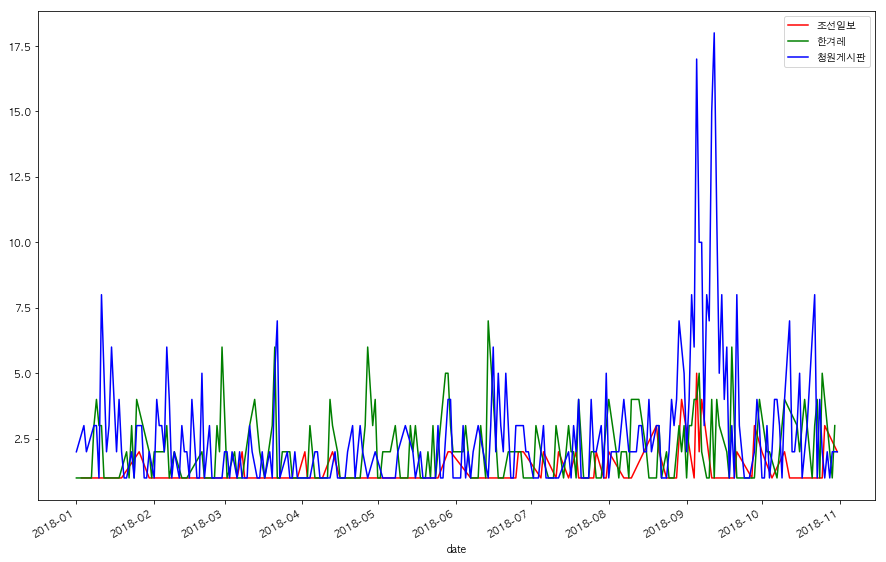

In [51]:
plt.figure(figsize=(15,10))
df1.groupby('date').size().plot(color = 'r')
df3.groupby('date').size().plot(color = 'g')
df2.groupby('date').size().plot(color = 'b')
plt.legend(('조선일보','한겨레','청원게시판'))

In [47]:
? plt.legend

,Unnamed: 0,제목,청원시작,청원인원,Link,본문,date
0,0,건전한 게임문화를 확립을 위하여 게임운영사의 게임내 게임 데이터판매응 처벌하여 주세요,2018-10-31,3,https://www1.president.go.kr/petitions/426949,아래에 적시된 법률 어디에도 바둑이 바다이야기등에만 적용된다는 내용은 없습니다. 겜...,2018-10-31
1,1,서민경제 살리고 출산율도 높이는 필수 요소 2가지.,2018-10-31,4,https://www1.president.go.kr/petitions/426738,서민경제 살리고 출산율도 높이는 필수 중요 요소 2가지. 1......출산율이 ...,2018-10-31
2,2,서민경제 살리고 출산율도 높이는 필수 요소 2가지.,2018-10-29,9,https://www1.president.go.kr/petitions/423705,서민경제 살리고 출산율도 높이는 중요 요소 2가지. 1......출산율이 폭락...,2018-10-29
3,3,5인 미만 회사는 직원을 마음대로 해고해도 되나요?,2018-10-29,7,https://www1.president.go.kr/petitions/423323,저는 얼마 전 근무하던 회사로부터 아무런 이유 없이 해고 되었습니다. 너무나 억울...,2018-10-29
4,4,개인회생 소급적용 인천 의정부 수원은 왜 적용안되나요,2018-10-28,22,https://www1.president.go.kr/petitions/423175,개인회생 소급적용 왜 의정부 인천 수원은 불가한건가요 인천에서 아이둘 키우며 세금 ...,2018-10-28
5,5,육군사관학교를 지방으로 이전하여 주세요,2018-10-27,4,https://www1.president.go.kr/petitions/422213,육군사관학교를 지방으로 이전하여 주세요 좁은 서울에 육군사관학교가 있어 서 불편합니...,2018-10-27
6,6,공공기관 지방이전으로 국토의 균형발전을이루워주세요,2018-10-27,6,https://www1.president.go.kr/petitions/422210,공공기관 지방이전으로 침체된 지방경제를 활성화하고 국토의균형발전과 함께 삶의질을 향...,2018-10-27
7,7,DMZ에 유엔평화대학교를 설립하여 평화를 구축하자,2018-10-26,302,https://www1.president.go.kr/petitions/420989,DMZ 유엔평화대학교 설립을 통합 평화 구축 손 기 웅(한국DMZ학회 회장) 1. ...,2018-10-26
8,8,공공기관 지방이전으로 국토의 균형발전을이루워주세요,2018-10-25,6,https://www1.president.go.kr/petitions/419942,공공기관 지방이전으로 침체된 지방경제를 활성화하고 국토의균형발전과 함께 삶의질을 향...,2018-10-25
9,9,세가지 제안,2018-10-25,3,https://www1.president.go.kr/petitions/419894,1 1)경제정책에 대한 생각 요즘 범죄 등 사회분위기가 험악해지는데는 정부가 현실...,2018-10-25
